# Linear Regression

Linear regression is a technique that measures the relationship between two variables. If we have an independent variable $X$, and a dependent outcome variable $Y$, linear regression allows us to determine which linear model $Y = \alpha + \beta X$ best explains the data. As an example, let's consider TSLA and SPY. We would like to know how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.

Python's statsmodels library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

In [1]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

First of all, we will define a function that performs linear regression and plots the results.

In [15]:
def linreg(X,Y):
    # Running the linear regression:
    X = sm.add_constant(X) # adding columns of 1s
    model = regression.linear_model.OLS(Y,X).fit()
    a = model.params[0] # alpha paramters
    b = model.params[1] # beta parameters
    X = X[:, 1] # now we get rid of the additional column of 1s that we added above
    
    # Return the summary of the regression and plot results:
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = a + X2*b # 'a' is like alpha hat and 'b' is like beta hat!
    plt.plot(X2, Y_hat, 'r', alpha=0.9); # Add a regression line of red colour
    plt.scatter(X, Y, alpha=0.3) #Plot the raw data
    plt.xlabel('X-Value (S%P 500)')
    plt.ylabel('Y-Value (TSLA)')
    plt.grid()
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.27
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.23e-14
Time:                        12:00:15   Log-Likelihood:                 549.18
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.532      0.595      -0.002       0.004
x1             1.9542      0.244      8.017      0.000       1.474       2.434
==============================================================================
Omnibus:                       64.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.766
Skew:                           0.865   Prob(JB):                     1.54e-82
Kurtosis:                       8.747   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

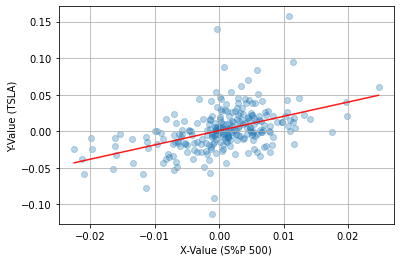

In [16]:
# Now we need to pull up the data

import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2014,1,1)
end = dt.datetime(2015,1,1)

benchmark = web.DataReader('SPY', "yahoo", start, end)['Adj Close']
asset =  web.DataReader('TSLA', "yahoo", start, end)['Adj Close']

# Now, we get the percent changes i.e. return:
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# Now we run the linear regression:
linreg(r_b.values, r_a.values)

We can see from the second table:
1. alpha has been estimated to be 0.0009
2. beta has been estimated to be 1.9542

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every 1% increased return we see from the SPY, we should see an extra 1.92% from TSLA. This is expressed by the parameter $\beta$, which is 1.9271 as estimated. Of course, for decresed return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

### Linear Regression vs Correlation

- Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
- Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
- Both are measures of covariance.
- Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

### Knowing Parameters vs. Estimates

It is very important to keep in mind that all $\alpha$ and $\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The parameters you estimate today may not be the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates. One way to get a sense of how stable your parameter estimates are is to estimate them using a rolling window of data and see how much variance there is in the estimates.

#### Example

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5210
Date:                Wed, 02 Jun 2021   Prob (F-statistic):              0.472
Time:                        12:07:11   Log-Likelihood:                -20.604
No. Observations:                 100   AIC:                             45.21
Df Residuals:                      98   BIC:                             50.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5234      0.059      8.931      0.000       0.407       0.640
x1            -0.0710      0.098     -0.722      0.472      -0.266       0.124
==============================================================================
Omnibus:                       45.957   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.778
Skew:                           0.083   Prob(JB):                       0.0337
Kurtosis:                       1.735   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

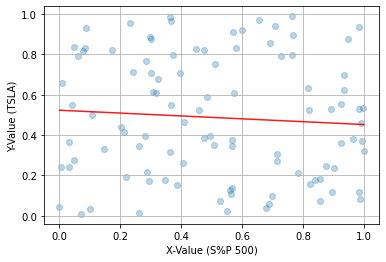

In [19]:
# Let us regress two absolutely random variables for the example:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X,Y)

The above shows a fairly uniform cloud of points. It is important to note that even with 100 samples, the line has a visible slope due to random chance. This is why it is crucial that you use statistical tests and not visualizations to verify your results.

Now let's make Y dependent on X plus some random noise.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3453.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.26e-78
Time:                        12:08:43   Log-Likelihood:                 150.31
No. Observations:                 100   AIC:                            -296.6
Df Residuals:                      98   BIC:                            -291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0922      0.011      8.645      0.000       0.071       0.113
x1             1.0230      0.017     58.764      0.000       0.988       1.058
==============================================================================
Omnibus:                       33.123   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.158
Skew:                          -0.110   Prob(JB):                       0.0460
Kurtosis:                       1.805   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

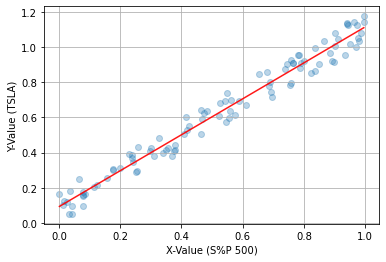

In [21]:
X = np.random.rand(100)
Y = X + 0.2*np.random.rand(100)
linreg(X,Y)


In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high $R^2$ value).

#### PLotting with Seaborn

C:\Users\Siddhartha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


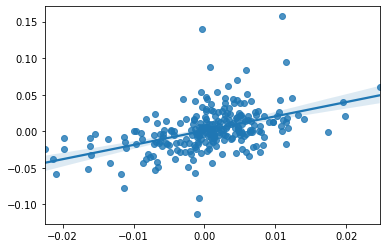

In [25]:
import seaborn
seaborn.regplot(r_b.values, r_a.values);